In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')  #to create grid in the background in graphs

%matplotlib inline
plt.rcParams['figure.figsize']=20,8 #to automatically change the size of pandas and mattplot charts
import plotly
import plotly.express as px #it is a wrapper of plotly
import plotly.graph_objects as go  #so that we can use plotly in a object oriented way

import cufflinks as cf  # used to bind plotly with pandas in a good way
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium    # helps to import maps

In [2]:
pyo.init_notebook_mode(connected=True) #so that it can connect without jupyter notebook
cf.go_offline() #so that we can use them offline together


In [3]:
df = pd.read_excel('C:/Users/DELL-INSPIRON/Desktop/Python DATA ANALYTICS/Covid/Covid cases in India.xlsx')
df.columns

Index(['S. No.', 'Name of State / UT',
       'Total Confirmed cases (Indian National)',
       'Total Confirmed cases ( Foreign National )', 'Cured', 'Death'],
      dtype='object')

In [93]:
df.drop(['S. No.'],axis=1,inplace=True) #axis=1 means from columns and axis=0 means from rows
df


,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,Andhra Pradesh,12,0,1,0
1,Chhattisgarh,6,0,0,0
2,Delhi,38,1,6,1
3,Gujarat,43,0,0,3
4,Haryana,16,14,11,0
5,Himachal Pradesh,4,0,0,1
6,Karnataka,20,0,3,2
7,Kerala,131,7,11,0
8,Madhya Pradesh,23,0,0,1
9,Maharashtra,144,3,15,4


In [94]:
df['Total Cases']=df['Total Confirmed cases (Indian National)']+df['Total Confirmed cases ( Foreign National )']
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30
5,Himachal Pradesh,4,0,0,1,4
6,Karnataka,20,0,3,2,20
7,Kerala,131,7,11,0,138
8,Madhya Pradesh,23,0,0,1,23
9,Maharashtra,144,3,15,4,147


In [95]:
Total_cases_overall =df['Total Cases'].sum()
print("Total cases overall in India:",Total_cases_overall)

Total cases overall in India: 729


In [96]:
df['Total Active Cases'] = df['Total Cases']-df['Cured']
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Total Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,33
3,Gujarat,43,0,0,3,43,43
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,4
6,Karnataka,20,0,3,2,20,17
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,23
9,Maharashtra,144,3,15,4,147,132


In [8]:
df.style.background_gradient(cmap='PuBu') #to get 1st 2nd 3rd.... highest

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Total Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,33
3,Gujarat,43,0,0,3,43,43
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,4
6,Karnataka,20,0,3,2,20,17
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,23
9,Maharashtra,144,3,15,4,147,132


In [9]:
Total_active_cases = df.groupby('Name of State / UT')['Total Active Cases'].sum().sort_values(ascending=False).to_frame()
Total_active_cases

,Total Active Cases
Name of State / UT,
Maharashtra,132
Kerala,127
Telengana,44
Gujarat,43
Rajasthan,40
Tamil Nadu,34
Delhi,33
Uttar Pradesh,32
Punjab,29


In [33]:
Total_active_cases.style.background_gradient(cmap='Reds')

,Total Active Cases
Name of State / UT,
Maharashtra,132
Kerala,127
Telengana,44
Gujarat,43
Rajasthan,40
Tamil Nadu,34
Delhi,33
Uttar Pradesh,32
Punjab,29


# Graphical Representation 
# Pandas

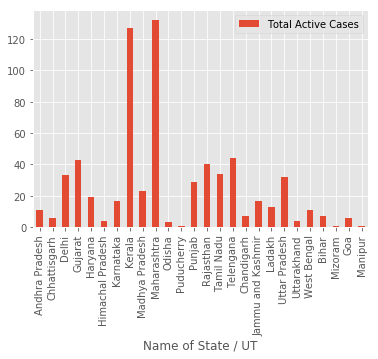

In [11]:
df.plot(kind='bar',x='Name of State / UT', y='Total Active Cases')

# Matplot Viz


<BarContainer object of 26 artists>

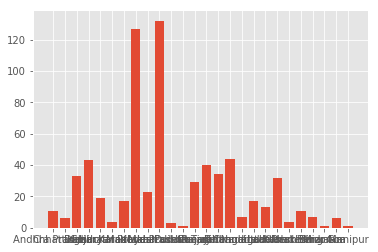

In [12]:
plt.bar(df['Name of State / UT'], df['Total Active Cases'])

# Plotly Viz

In [13]:
df.iplot(kind='bar',x='Name of State / UT', y='Total Active Cases')

# PLotly Express

In [14]:
px.bar(df, x='Name of State / UT', y='Total Active Cases') #px is a wrapper of plotly and plotly works behind plotly express hence px is better.

In [15]:
df.plot(kind='scatter',x='Name of State / UT', y='Total Active Cases',grid=True) #pandas

ValueError: scatter requires x column to be numeric

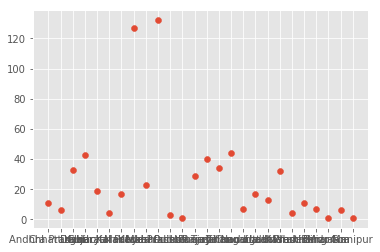

In [16]:
plt.scatter(df['Name of State / UT'], df['Total Active Cases'])  #matplot

In [17]:
df.iplot(kind='scatter',x='Name of State / UT', y='Total Active Cases',mode='markers+lines',colors='red',size=20) #plotly

In [100]:
px.scatter(df,x='Name of State / UT', y='Total Active Cases') #px

# Object oriented method of matplot and plotly

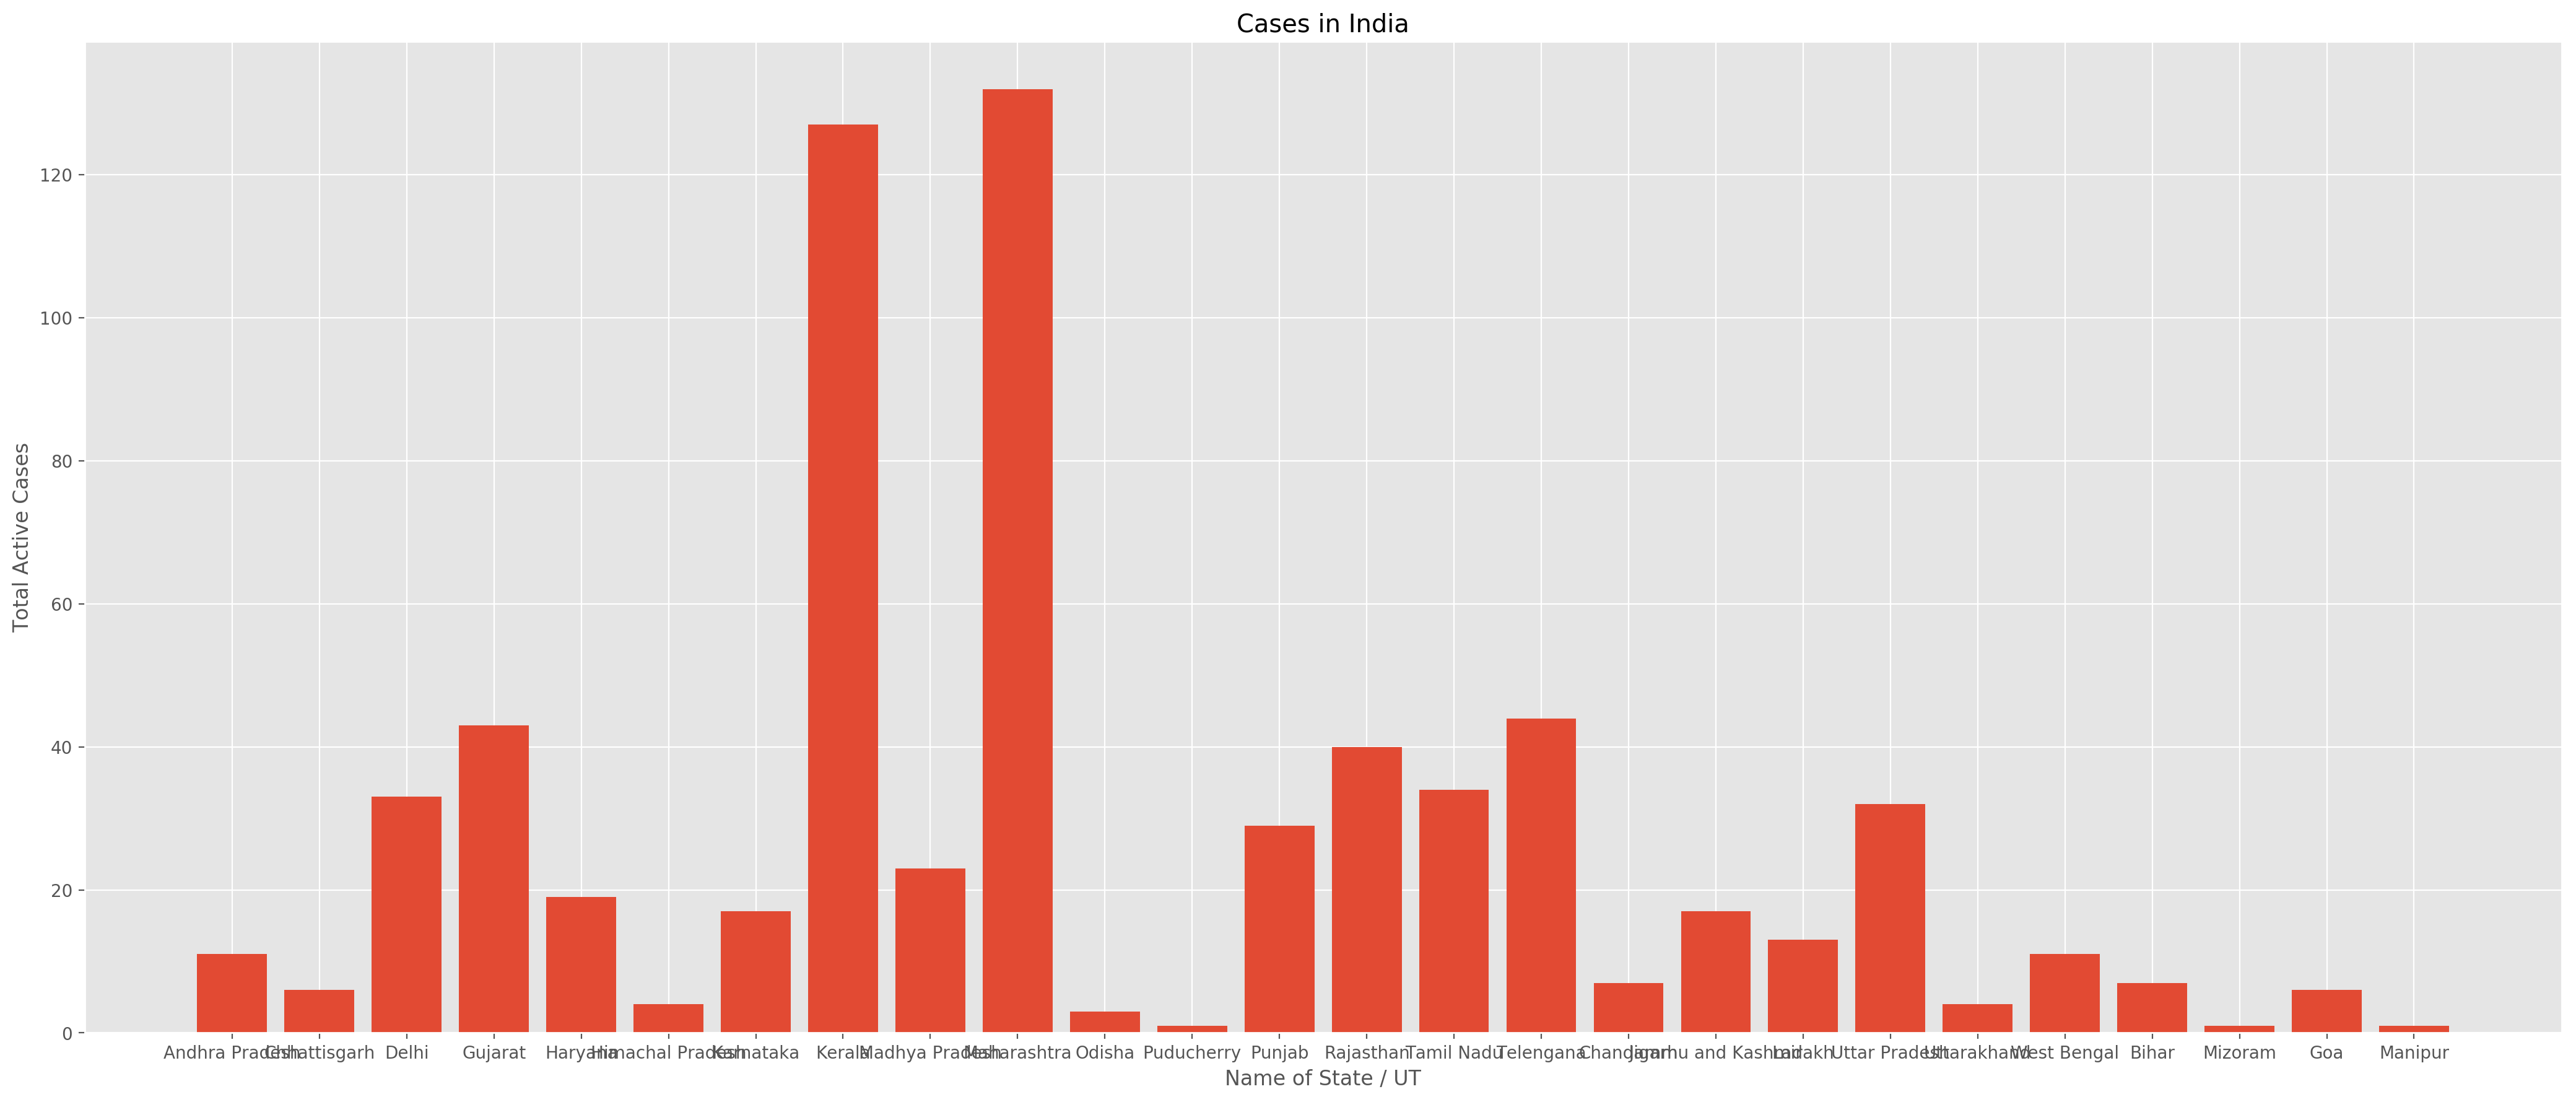

In [101]:
fig=plt.figure(figsize=(20,8),dpi=200) #creates a space for the graph #dpi=dots per inches(pixels)
# to see the space use as below:
axes = fig.add_axes([0,0,1,1])  #left,bottom,width,height
axes.bar(df['Name of State / UT'], df['Total Active Cases'])
axes.set_title('Cases in India')
axes.set_xlabel('Name of State / UT')
axes.set_ylabel('Total Active Cases')
plt.show()

# Plotly graph oriented

In [102]:
fig=go.Figure()
fig.add_trace(go.Bar(x=df['Name of State / UT'],y=df['Total Active Cases']))
fig.update_layout(title='Cases in India',xaxis=dict(title='Name of State / UT'),yaxis=dict(title='Total Active Cases'))

# Map

In [103]:
Indian_Cord = pd.read_excel('C:/Users/DELL-INSPIRON/Desktop/Python DATA ANALYTICS/Covid/Indian Coordinates.xlsx')
Indian_Cord

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Dadra And Nagar Haveli,20.266578,73.016618
8,Delhi,28.669993,77.230004
9,Goa,15.491997,73.818001


In [112]:
df['Name of State / UT1']=df['Name of State / UT']
Indian_Cord['Name of State / UT1']=df['Name of State / UT']
#Indian_Cord
df_full=pd.merge(Indian_Cord,df, on = 'Name of State / UT1')
df_full

,Name of State / UT_x,Latitude,Longitude,Name of State / UT1,Name of State / UT_y,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Total Active Cases
0,Andaman And Nicobar,11.667026,92.735983,Andhra Pradesh,Andhra Pradesh,12,0,1,0,12,11
1,Andhra Pradesh,14.750429,78.570026,Chhattisgarh,Chhattisgarh,6,0,0,0,6,6
2,Arunachal Pradesh,27.100399,93.616601,Delhi,Delhi,38,1,6,1,39,33
3,Assam,26.749981,94.216667,Gujarat,Gujarat,43,0,0,3,43,43
4,Bihar,25.785414,87.479973,Haryana,Haryana,16,14,11,0,30,19
5,Chandigarh,30.719997,76.780006,Himachal Pradesh,Himachal Pradesh,4,0,0,1,4,4
6,Chhattisgarh,22.090420,82.159987,Karnataka,Karnataka,20,0,3,2,20,17
7,Dadra And Nagar Haveli,20.266578,73.016618,Kerala,Kerala,131,7,11,0,138,127
8,Delhi,28.669993,77.230004,Madhya Pradesh,Madhya Pradesh,23,0,0,1,23,23
9,Goa,15.491997,73.818001,Maharashtra,Maharashtra,144,3,15,4,147,132


In [114]:
map = folium.Map(location=[20,80],zoom_start=4,tiles='Stamenterrain') #zoom_start= shows map in a particular zoom range
#Stamenterrain= there are different types of graph but we choose Stamenterrain
#google using folium map tiles

for lat,long,value,name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total Cases'],df_full['Name of State / UT1']):
    folium.CircleMarker([lat,long],radius=value*0.8,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases</strong>: '+str(value)+'</br>'), color='red',fill_color='red',fill_opacity=0.3).add_to(map)
    

In [115]:
map

# How Covid is spreading globaly

In [25]:
dbd_India=pd.read_excel('C:/Users/DELL-INSPIRON/Desktop/Python DATA ANALYTICS/Covid/per_day_cases.xlsx',parse_dates=True,sheet_name="India")
dbd_Italy=pd.read_excel('C:/Users/DELL-INSPIRON/Desktop/Python DATA ANALYTICS/Covid/per_day_cases.xlsx',parse_dates=True,sheet_name="Italy")
dbd_Korea=pd.read_excel('C:/Users/DELL-INSPIRON/Desktop/Python DATA ANALYTICS/Covid/per_day_cases.xlsx',parse_dates=True,sheet_name="Korea")
dbd_Wuhan=pd.read_excel('C:/Users/DELL-INSPIRON/Desktop/Python DATA ANALYTICS/Covid/per_day_cases.xlsx',parse_dates=True,sheet_name="Wuhan")
dbd_India

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN
5,2020-02-04,3,0,NaN
6,2020-02-05,3,0,NaN
7,2020-02-06,3,0,NaN
8,2020-02-07,3,0,NaN
9,2020-02-08,3,0,NaN


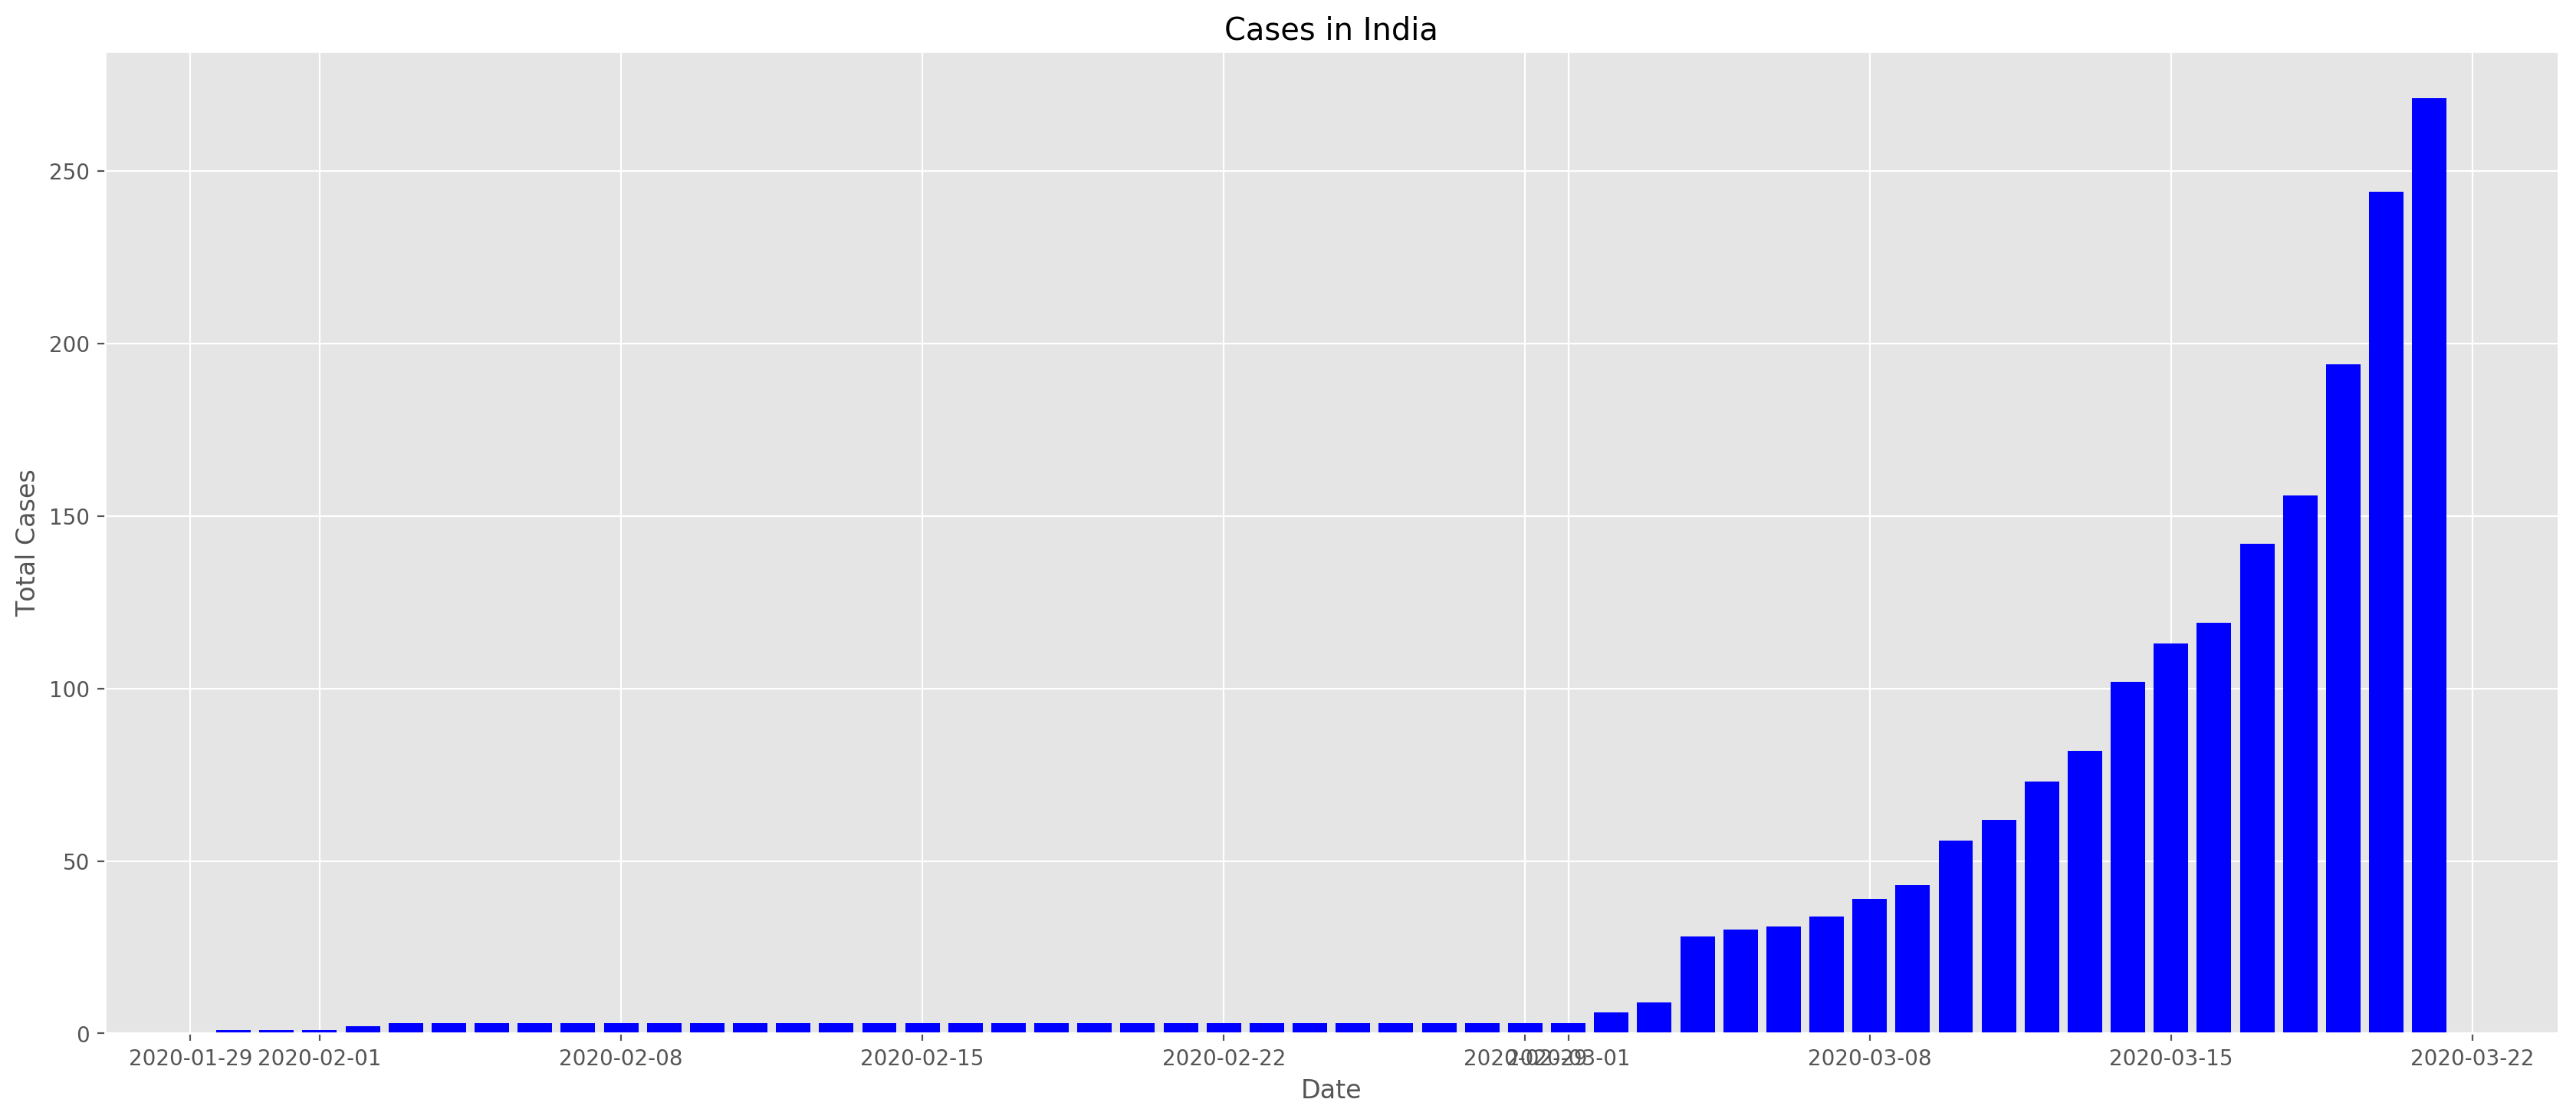

In [26]:
#matplot
fig=plt.figure(figsize=(20,8),dpi=200) #creates a space for the graph #dpi=dots per inches(pixels)
# to see the space use as below:
axes = fig.add_axes([0.1,.1,.8,.8])
axes.bar(dbd_India["Date"],dbd_India['Total Cases'],color='blue')
axes.set_title('Cases in India')
axes.set_xlabel('Date')
axes.set_ylabel('Total Cases')
plt.show()

#plotly

px.bar(dbd_India,x="Date",y='Total Cases',title='Cases in India', hover_name='Total Cases',color='Total Cases')

In [27]:
px.bar(dbd_Italy,x="Date",y='Total Cases',title='Cases in Italy', hover_name='Total Cases',color='Total Cases')




In [28]:
px.bar(dbd_Wuhan,x="Date",y='Total Cases',title='Cases in Wuhan',color='Total Cases')

In [29]:
px.bar(dbd_Korea,x="Date",y='Total Cases',title='Cases in Korea', hover_name='Total Cases',color='Total Cases')

# In Subplot we can compare multiple graphs side by side

In [30]:
from plotly.subplots import make_subplots

In [48]:
fig=make_subplots(
    rows=2,cols=2,
    specs=[[{'secondary_y':True},{'secondary_y':True}],[{'secondary_y':True},{'secondary_y':True}]],
    subplot_titles=('S.Korea','Italy','India','Wuhan'))



In [50]:
fig.add_trace(go.Bar(x=dbd_Korea['Date'],y=dbd_Korea['Total Cases'],
                     marker=dict(color=dbd_Korea['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'],y=dbd_Italy['Total Cases'],
                     marker=dict(color=dbd_Italy['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Bar(x=dbd_India['Date'],y=dbd_India['Total Cases'],
                     marker=dict(color=dbd_India['Total Cases'],coloraxis="coloraxis")),2,1)

fig.add_trace(go.Bar(x=dbd_Wuhan['Date'],y=dbd_Wuhan['Total Cases'],
                     marker=dict(color=dbd_Wuhan['Total Cases'],coloraxis="coloraxis")),2,2)


fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text="Total Cases in 4 Countries")
# fig.update_layout(plot_bgcolor='rgb(230,230,230)')

# World CoronaVirus

In [54]:
df1 = pd.read_csv('C:/Users/DELL-INSPIRON/Desktop/Python DATA ANALYTICS/Covid/covid_19_data.csv', parse_dates=['Last Update'])
df1

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,2020-01-22 17:00:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,2020-01-22 17:00:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,2020-01-22 17:00:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0


In [70]:
df1.rename(columns={'ObservationDate': 'Date', 'Country/Region':'Country'},inplace=True)
df1.drop(['SNo'],axis=1,inplace=True)
df1

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
5,01/22/2020,Guangdong,Mainland China,2020-01-22 17:00:00,26.0,0.0,0.0
6,01/22/2020,Guangxi,Mainland China,2020-01-22 17:00:00,2.0,0.0,0.0
7,01/22/2020,Guizhou,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
8,01/22/2020,Hainan,Mainland China,2020-01-22 17:00:00,4.0,0.0,0.0
9,01/22/2020,Hebei,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0


In [71]:
df1.query('Country=="India"')

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
430,01/30/2020,NaN,India,2020-01-30 16:00:00,1.0,0.0,0.0
491,01/31/2020,NaN,India,2020-01-31 23:59:00,1.0,0.0,0.0
547,02/01/2020,NaN,India,2020-01-31 08:15:00,1.0,0.0,0.0
607,02/02/2020,NaN,India,2020-02-02 06:03:08,2.0,0.0,0.0
672,02/03/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
740,02/04/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
810,02/05/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
881,02/06/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
954,02/07/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
1026,02/08/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0


In [140]:
f1 = df1.groupby('Date').sum().reset_index()
f1

,Date,Confirmed,Deaths,Recovered
0,01/22/2020,555.0,17.0,28.0
1,01/23/2020,653.0,18.0,30.0
2,01/24/2020,941.0,26.0,36.0
3,01/25/2020,1438.0,42.0,39.0
4,01/26/2020,2118.0,56.0,52.0
5,01/27/2020,2927.0,82.0,61.0
6,01/28/2020,5578.0,131.0,107.0
7,01/29/2020,6165.0,133.0,126.0
8,01/30/2020,8235.0,171.0,143.0
9,01/31/2020,9925.0,213.0,222.0


In [142]:
fig= go.Figure()
fig.add_trace(go.Scatter(x=f1['Date'],y=f1['Confirmed'],mode='lines+markers',name='Confirmed',line=dict(color='blue',width=2)))
fig.add_trace(go.Scatter(x=f1['Date'],y=f1['Deaths'],mode='lines+markers',name='Deaths',line=dict(color='red',width=2)))
fig.add_trace(go.Scatter(x=f1['Date'],y=f1['Recovered'],mode='lines+markers',name='Recovered',line=dict(color='green',width=2)))

In [143]:
df_confirmed=pd.read_csv('C:/Users/DELL-INSPIRON/Desktop/Python DATA ANALYTICS/Covid/time_series_covid_19_confirmed.csv')
df_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,13,21,21,27,32,32,39,46,64,64
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,22,26,28,38,48,55,65,65,92,112
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,10,10,11,11,15,18,21,21,36,49
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,13,13,13,15,15,18,20,20,35,46
9,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,1,...,1,1,1,2,2,2,3,3,5,7


In [ ]:
df_confirmed.rename(columns={'Country/Region':'Country'},inplace=True)

In [147]:
df_latlog = pd.merge(df1,df_confirmed,on=['Country','Province/State'])
df_latlog

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Lat,Long,1/22/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,01/22/2020,Washington,US,2020-01-22 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,0,...,0,0,0,0,0,267,366,442,568,572
1,01/23/2020,Washington,US,2020-01-23 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,0,...,0,0,0,0,0,267,366,442,568,572
2,01/24/2020,Washington,US,2020-01-24 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,0,...,0,0,0,0,0,267,366,442,568,572
3,01/25/2020,Washington,US,2020-01-25 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,0,...,0,0,0,0,0,267,366,442,568,572
4,01/26/2020,Washington,US,2020-01-26 16:00:00,1.0,0.0,0.0,47.4009,-121.4905,0,...,0,0,0,0,0,267,366,442,568,572
5,01/27/2020,Washington,US,2020-01-27 23:59:00,1.0,0.0,0.0,47.4009,-121.4905,0,...,0,0,0,0,0,267,366,442,568,572
6,01/28/2020,Washington,US,2020-01-28 23:00:00,1.0,0.0,0.0,47.4009,-121.4905,0,...,0,0,0,0,0,267,366,442,568,572
7,01/29/2020,Washington,US,2020-01-29 19:30:00,1.0,0.0,0.0,47.4009,-121.4905,0,...,0,0,0,0,0,267,366,442,568,572
8,01/30/2020,Washington,US,2020-01-30 16:00:00,1.0,0.0,0.0,47.4009,-121.4905,0,...,0,0,0,0,0,267,366,442,568,572
9,01/31/2020,Washington,US,2020-01-31 23:59:00,1.0,0.0,0.0,47.4009,-121.4905,0,...,0,0,0,0,0,267,366,442,568,572


In [154]:
fig=px.density_mapbox(df_latlog,lat='Lat',lon='Long',hover_name='Province/State',hover_data=['Confirmed','Deaths','Recovered'],
                      animation_frame='Date',
                      color_continuous_scale='Portland',radius=7,zoom=0,height=700)

In [159]:
fig.update_layout(title='WorldWide Corona Virus Cases')
fig.update_layout(mapbox_style='open-street-map',mapbox_center_lon=0)
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})